<a href="https://colab.research.google.com/github/Valdini/Machine-Learning-Curriculum/blob/master/ML_Code_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#ML Code Master

#import dependencies
!apt-get -q install -y graphviz
!pip install -U -q PyDrive
!pip install pydotplus
!pip install -q pydot
from keras.utils import plot_model
from IPython.display import HTML, SVG
import pandas as pd
import io
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials
import pydot
import pydotplus
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, cross_validation
from numpy import array
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import datasets
from sklearn import tree
from IPython.display import Image
from sklearn.externals.six import StringIO
from pydotplus import graphviz, Graph
import pydrive
from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
print('basic dependencies imported')

In [0]:
#Importing Data from Google Drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':'18vqfoBJhG61i51E1wZNUgX_nYRRt32GH'}) #get this ID by copy pasting share link and removing rest of URL
downloaded.GetContentFile('HDC_250k.csv') #name of a file
features = pd.read_csv('HDC_250k.csv')
features = features.drop(columns = ['residence'])
print('data imported')

In [0]:
#labelencode data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
bookingdate = features['bookingdate'] = le.fit_transform(features['bookingdate'])
price = features['price'] = le.fit_transform(features['price'])
bookingsource = features['bookingsource'] = le.fit_transform(features['bookingsource'])
#residence = features['residence'] = le.fit_transform(features['residence'])
durationindays = features['durationindays'] = le.fit_transform(features['durationindays'])
paymenttype = features['paymenttype'] = le.fit_transform(features['paymenttype'])
participants = features['participants'] = le.fit_transform(features['participants'])
traveltype = features['traveltype'] = le.fit_transform(features['traveltype'])
hotelcity = features['hotelcity'] = le.fit_transform(features['hotelcity'])
hotelregion = features['hotelregion'] = le.fit_transform(features['hotelregion'])
hotelcountry = features['hotelcountry'] = le.fit_transform(features['hotelcountry'])
catering = features['catering'] = le.fit_transform(features['catering'])
departureairport = features['departureairport'] = le.fit_transform(features['departureairport'])
departuredate = features['departuredate'] = le.fit_transform(features['departuredate'])
c = features['c'] = le.fit_transform(features['c'])
print('features labelencoded')

#hotencode data
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
#userid = enc.fit_transform(features.userid.values.reshape(-1,1)).toarray()
#bookingdate = enc.fit_transform(features.bookingdate.values.reshape(-1,1)).toarray()
#price = enc.fit_transform(features.price.values.reshape(-1,1)).toarray()
bookingsource = enc.fit_transform(features.bookingsource.values.reshape(-1,1)).toarray()
#residence = enc.fit_transform(features.residence.values.reshape(-1,1)).toarray()
#durationindays = enc.fit_transform(features.durationindays.values.reshape(-1,1)).toarray()
paymenttype = enc.fit_transform(features.paymenttype.values.reshape(-1,1)).toarray()
#participants = enc.fit_transform(features.participants.values.reshape(-1,1)).toarray()
traveltype = enc.fit_transform(features.traveltype.values.reshape(-1,1)).toarray()
hotelcity = enc.fit_transform(features.hotelcity.values.reshape(-1,1)).toarray()
hotelregion = enc.fit_transform(features.hotelregion.values.reshape(-1,1)).toarray()
hotelcountry = enc.fit_transform(features.hotelcountry.values.reshape(-1,1)).toarray()
catering = enc.fit_transform(features.catering.values.reshape(-1,1)).toarray()
departureairport = enc.fit_transform(features.departureairport.values.reshape(-1,1)).toarray()
#departuredate = enc.fit_transform(features.departuredate.values.reshape(-1,1)).toarray()
#c = enc.fit_transform(features.c.values.reshape(-1,1)).toarray()

In [0]:
#imputer - missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer.fit(x)
print('missing values imputed')

In [0]:
#data split
x = features.drop(['c'], axis = 1)
y = features['c']
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3)
print('data split')

#feature scaling. StandardScaler is for standardization. MinMax Scaler is for normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print('features scaled')

#below follow different models to potentially be applied in such kind of analysis

In [0]:
#applying PCA for feature selection
from sklearn.decomposition import PCA
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
featurenames = list(x.columns)
indices = np.argsort(explained_variance)[::-1]
print("Variance Causation Ranking:")
for f in range(x.shape[1]):
    print("%d. %s (%f)" % (f + 1, featurenames[f], explained_variance[indices[f]]))
print('PCA applied')

In [0]:
#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf8, X = x_train, y = y_train, cv = 10)
print("Accuracies Mean:", accuracies.mean())
print("Accuracies Std Deviation:", accuracies.std())
from sklearn.metrics import accuracy_score
print("Accuracy score:", accuracy_score(y_test, y_pred))

In [0]:

#GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
parameters = [{'presort': ['True', 'False'], 'max_leaf_nodes': [2,5,7,10], 'min_impurity_decrease': [0,3,5,10]}] 
grid_search = GridSearchCV(estimator = clf8, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
print("Best Grid CV Score:", grid_search.best_score_)
print("Best Grid CV Params:", grid_search.best_params_)

In [0]:
#Random Forest
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=500, random_state=0)
clf = clf.fit(x_train, y_train)
print('classifier fit')
y_pred = clf.predict(x_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score Random Forest:', acc)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import roc_auc_score
cap = roc_auc_score(y_test, y_pred, average='macro', sample_weight=None)
print('AUC Score Random Forest:', cap)

In [0]:
#Linear SVC
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
x_train, y_train = make_classification(n_features=13, random_state=0)
clf9 = LinearSVC(random_state=0)
clf9.fit(x_train, y_train)
y_pred = clf9.predict(x_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score Linear SVC:', acc)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import roc_auc_score
cap = roc_auc_score(y_test, y_pred, average='macro', sample_weight=None)
print('AUC Score Linear SVC:', cap)

In [0]:
#Kernel SVM - Polynomial
from sklearn.svm import SVC
clf2 = SVC(kernel = 'poly')
clf2.fit(x_train, y_train)
y_pred = clf2.predict(x_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score Kernel SVM - Polynomial:', acc)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import roc_auc_score
cap = roc_auc_score(y_test, y_pred, average='macro', sample_weight=None)
print('AUC Score Kernel SVM - Polynomial:', cap)

In [0]:
#Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
clf3 = BernoulliNB(fit_prior = 'True')
clf3.fit(x_train, y_train)
y_pred = clf3.predict(x_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score Bernoulli Naive Bayes:', acc)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import roc_auc_score
cap = roc_auc_score(y_test, y_pred, average='macro', sample_weight=None)
print('AUC Score Bernoulli Naive Bayes:', cap)

In [0]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf4 = LogisticRegression()
clf4.fit(x_train, y_train)
y_pred = clf4.predict(x_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score Logistic Regression:', acc)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import roc_auc_score
cap = roc_auc_score(y_test, y_pred, average='macro', sample_weight=None)
print('AUC Score Logistic Regression:', cap)

In [0]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
clf5 = KNeighborsClassifier(n_neighbors=1)
clf5.fit(x_train, y_train)
y_pred = clf5.predict(x_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score K-Nearest Neighbors:', acc)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import roc_auc_score
cap = roc_auc_score(y_test, y_pred, average='macro', sample_weight=None)
print('AUC Score K-Nearest Neighbors:', cap)

In [0]:
#XGBoost
from sklearn.ensemble import GradientBoostingClassifier
clf6 = GradientBoostingClassifier (learning_rate = 0.01, n_estimators = 1000)
clf6.fit(x_train, y_train)
y_pred = clf6.predict(x_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score XGBoost:', acc)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import roc_auc_score
cap = roc_auc_score(y_test, y_pred, average='macro', sample_weight=None)
print('AUC Score XGBoost:', cap)

In [0]:
#Kernel SVM - RBF
from sklearn.svm import SVC
clf7 = SVC(kernel = 'rbf')
clf7.fit(x_train, y_train)
y_pred = clf7.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score Kernel SVM - RBF:', acc)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import roc_auc_score
cap = roc_auc_score(y_test, y_pred, average='macro', sample_weight=None)
print('AUC Score Kernel SVM - RBF:', cap)

In [0]:
#Decision Tree
from sklearn import tree
clf8 = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', max_depth = 15, min_samples_split = 5, min_samples_leaf = 3, random_state = 0)
clf8.fit(x_train, y_train)
y_pred = clf8.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score Decision Tree:', acc)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import roc_auc_score
cap = roc_auc_score(y_test, y_pred, average='macro', sample_weight=None)
print('AUC Score Decision Tree:', cap)

In [0]:
#Neural Net - Option 1

def denormalize(features,norm_data):
    features = features[['c']].values.reshape(-1,1)
    scl = MinMaxScaler()
    a = scl.fit_transform(norm_data)
    new = scl.inverse_transform(norm_data)
    norm_data = norm_data.reshape(-1,1)
def neural_net_model(X_data,input_dim):
    W_1 = tf.Variable(tf.random_uniform([input_dim,10]))
    b_1 = tf.Variable(tf.zeros([10]))
    layer_1 = tf.add(tf.matmul(X_data,W_1), b_1)
    layer_1 = tf.nn.relu(layer_1)
    #W_2 = tf.Variable(tf.random_uniform([10,10]))
    #b_2 = tf.Variable(tf.zeros([10]))
    #layer_2 = tf.add(tf.matmul(layer_1,W_2), b_2)
    #layer_2 = tf.nn.relu(layer_2)
    W_O = tf.Variable(tf.random_uniform([10,1]))
    b_O = tf.Variable(tf.zeros([1]))
    output = tf.add(tf.matmul(layer_1,W_O), b_O)
    return output
print('functions setup')
xs = tf.placeholder("float")
ys = tf.placeholder("float")
output = neural_net_model(xs,13)
cost = tf.reduce_mean(tf.square(output-ys))
train = tf.train.GradientDescentOptimizer(0.001).minimize(cost)
print('model setup')
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  saver = tf.train.Saver()
  for i in range(20):
    for j in range(x_train.shape[1]):
     sess.run([cost,train],feed_dict = {xs:x_train[j,:].reshape(1,13), ys:y_train[j]})
      #c_t.append(sess.run(cost, feed_dict = {xs:x_train,ys:y_train}))
      #c_t.append(sess.run(cost, feed_dict = {xs:x_test,ys:y_test}))
      #print('Epoch :',i,'Cost :',c_t[i])
     pred = sess.run(output, feed_dict={xs:x_test})
     pred = (pred <= 1)
     #print('Cost :',sess.run(cost, feed_dict={xs:x_test,ys:y_test}))
     #correct = tf.equal(tf.argmax(pred, 1), tf.argmax(y_test, 1))
     #accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
     #print('Accuracy:', accuracy.eval({xs:x_train, ys:y_train}))
print('session run')
#y_test = scaler.inverse_transform(y_test)
#pred = scaler.inverse_transform(pred)
#y_test = denormalize(features_test,y_test)
#pred = denormalize(features_test,pred)
#print('variables retransformed')

In [0]:
#Neural Net - Option 2 with Keras

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import losses
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=11, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Evaluate model using standardized dataset. 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)

model = Sequential()
model.add(Dense(10, input_dim=11, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
y_pred = model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred.astype(int)))
print(classification_report(y_test, y_pred.astype(int)))
results = cross_val_score(pipeline, y_pred.astype(int), y_test, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

'''# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'normal', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'normal', activation = 'relu'))
classifier.add(Dropout(0.2))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'normal', activation = 'relu'))

# Compiling the ANN
from keras import optimizers
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train), y_train)
classifier.fit(x_train, y_train, batch_size = 100, nb_epoch = 10, verbose=1, validation_split=0.5, class_weight= 'auto', shuffle = True)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

Feature ranking:
1. bookingdate (0.692099)
2. price (0.177489)
3. durationindays (0.074568)
4. bookingsource (0.050500)
5. paymenttype (0.005344)
6. participants (0.000000)
7. traveltype (0.000000)
8. hotelcity (0.000000)
9. hotelregion (0.000000)
10. hotelcountry (0.000000)
11. catering (0.000000)
12. departureairport (0.000000)
13. departuredate (0.000000)


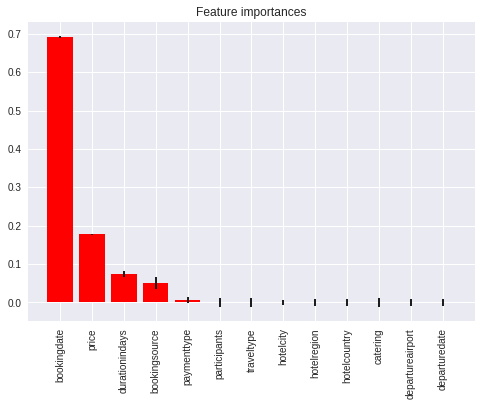

In [0]:
#Further analysis

#Decision Tree Feature Importances
importances = clf8.feature_importances_
featurenames = list(features.columns)
std = np.std([tree.feature_importances_ for tree in clf8.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(x.shape[1]):
    print("%d. %s (%f)" % (f + 1, featurenames[f], importances[indices[f]]))
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), featurenames, rotation = 90)
plt.xlim([-1, x.shape[1]])
plt.show()

In [0]:
#Plotting Decision Tree and Saving to GDrive
from sklearn.tree import export_graphviz
dot_data = StringIO()
feature_names = list(x.columns)
tree.export_graphviz(clf8, out_file=dot_data, 
                             max_depth= 7, class_names= None,
                             label=None, filled=False, 
                             leaves_parallel=False, impurity=False, 
                             node_ids=False, proportion=True, rotate=True, 
                             rounded= True, special_characters=True, feature_names = feature_names)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
graph.write_png('hdc_clv_new-tree.png')
uploaded = drive.CreateFile({'title': 'hdc_clv_new-tree.png'})
uploaded.SetContentFile('hdc_clv_new-tree.png')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1d3k3nZulU7QYUIaVy4p18AZTMhh8BFxp
